In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plot
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
#Import data set and packages

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.dtypes
#highlevel review of dataset

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
df['readmitted'].unique()
#understand values in desired field for analysis

array(['NO', '>30', '<30'], dtype=object)

In [8]:
df['A1Cresult'].unique()
#understand values in desired field for analysis

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [9]:
df0 = df.loc[:,['encounter_id','patient_nbr', 'num_medications', 'A1Cresult','readmitted']]
df0
#Keep desired columns

,encounter_id,patient_nbr,num_medications,A1Cresult,readmitted
0,2278392,8222157,1,None,NO
1,149190,55629189,18,None,>30
2,64410,86047875,13,None,NO
3,500364,82442376,16,None,NO
4,16680,42519267,8,None,NO
...,...,...,...,...,...
101761,443847548,100162476,16,>8,>30
101762,443847782,74694222,18,None,NO
101763,443854148,41088789,9,None,NO
101764,443857166,31693671,21,None,NO


In [10]:
df1=df0[df0['A1Cresult'] != 'None']
df1
#purpose of analysis is to compare A1C reuslts under various conditions; drop any instances where A1C was not measured

,encounter_id,patient_nbr,num_medications,A1Cresult,readmitted
26,236316,40523301,18,>7,NO
74,955884,93196251,17,>7,>30
98,1257282,84488562,6,>8,NO
103,1270524,67897251,12,Norm,NO
107,1455252,96440301,11,Norm,>30
...,...,...,...,...,...
101749,443816024,106392411,29,Norm,NO
101751,443835140,175326800,65,Norm,NO
101754,443842016,183087545,33,>7,>30
101755,443842022,188574944,26,>8,>30


In [11]:
df1['num_medications'].unique()
#confirming that values beyond 0 are still contained in the dataset
#reveals that there is a wide range of values; could benefit from creating smaller buckets

array([18, 17,  6, 12, 11, 19, 24, 16, 21, 22, 15, 20, 27, 13,  3,  7,  4,
        9,  8, 14,  1,  5, 33, 31, 61,  2, 26, 10, 29, 32, 23, 25, 34, 37,
       28, 36, 30, 40, 35, 38, 42, 50, 45, 39, 52, 44, 46, 57, 48, 43, 53,
       51, 41, 47, 49, 54, 62, 55, 58, 60, 69, 65, 59, 66, 75, 56, 63],
      dtype=int64)

In [12]:
df1['num_medications'].describe()
#descriptive stats of measurement field

count    17018.000000
mean        16.392819
std          8.543275
min          1.000000
25%         10.000000
50%         15.000000
75%         21.000000
max         75.000000
Name: num_medications, dtype: float64

,encounter_id,patient_nbr,num_medications
A1Cresult,,,
>7,1.785737e+08,5.672681e+07,16.841028
>8,1.539054e+08,5.012684e+07,16.109907
Norm,1.853065e+08,6.018860e+07,16.516232


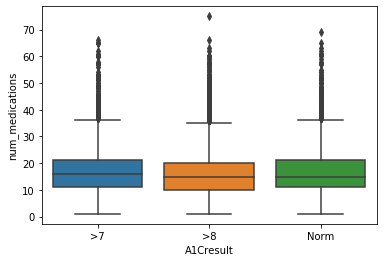

In [20]:
sn.boxplot(x="A1Cresult",y="num_medications",data=df1)
df1.groupby('A1Cresult').mean()
#create a boxplot based on A1C result

,encounter_id,patient_nbr,num_medications
readmitted,,,
<30,1.667466e+08,5.541018e+07,17.702864
>30,1.626529e+08,5.921823e+07,16.943448
NO,1.726090e+08,5.157122e+07,15.828023


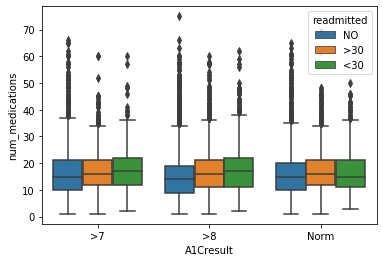

In [21]:
sn.boxplot(x="A1Cresult",y="num_medications",hue="readmitted",data=df1)
df1.groupby('readmitted').mean()
#create a boxplot based on A1C result

In [ ]:
#Conclusion - looking at A1C Result alone, there is little evidence to support that the number of medications a patient takes is correlated to their A1C level. 
#However, factoring in whether or not a patient has been readmitted shows that if a patient with an abnormal A1C result was readmitted within 30 days (so would assume a more severe case),they would consume more scripts on average than a patient with an abnormal A1C result that was either not readmitted or readmitted in greater than 30 days 